In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# # pwd
# os.chdir('..')
# df_all = pd.read_csv('/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/data/all_data.csv')

cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [4]:
df_all = pd.read_csv(f"{root_directory}/data/all_data.csv")
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(10280737, 27)

In [27]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



KeyError: 'method'

In [28]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))
df_all['M'] 

0             U.R.
1             U.R.
2             U.R.
3             U.R.
4             U.R.
             ...  
10280732    D.F.C.
10280733    D.F.C.
10280734    D.F.C.
10280735    D.F.C.
10280736    D.F.C.
Name: M, Length: 10280737, dtype: category
Categories (14, object): ['D.E.G.F.', 'D.E.G.U.', 'D.F.C.', 'E.G.F.', ..., 'V.F.C.', 'V.F.H.C.', 'V.F.H.R.', 'V.F.R.']

In [6]:
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

In [7]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date'],
      dtype='object')

In [8]:
# df_all.groupby('method').get_group('Frontier_Random')['delta_time'].hist()
# df_all.groupby('method').get_group('Epsilon_Greedy_Frontier')['delta_time'].hist()

# sns hist of delta_time
# sns.histplot(data=df_all_no_epsilon, x="delta_time", hue="method", bins=100)



In [9]:
# gr = df_all.groupby(['Method']).get_group('Epsilon Greedy Frontier').groupby(['Experiment Id'])
# gr.sample(100)

In [10]:
# gr[['Frame Count','Area Percent']]

<AxesSubplot:>

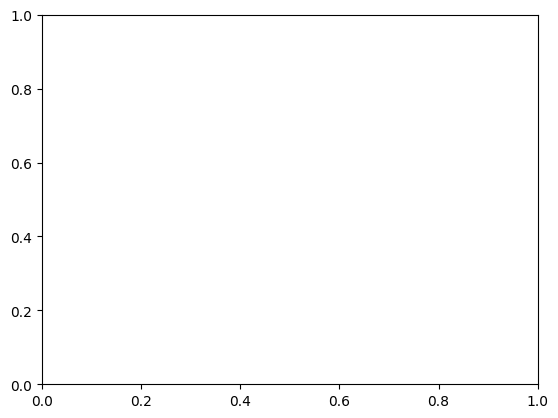

In [11]:
sns.lineplot(data=df_all[df_all=='Unknown Random'],
        x="Frame Count", y='Area Percent', hue="Experiment Id")

In [12]:
df_all['Method']

0                      Unknown Random
1                      Unknown Random
2                      Unknown Random
3                      Unknown Random
4                      Unknown Random
                      ...            
10280732    Decision Frontier Closest
10280733    Decision Frontier Closest
10280734    Decision Frontier Closest
10280735    Decision Frontier Closest
10280736    Decision Frontier Closest
Name: Method, Length: 10280737, dtype: category
Categories (14, object): ['Decay Epsilon Greedy Frontier', 'Decay Epsilon Greedy Unknown', 'Decision Frontier Closest', 'Epsilon Greedy Frontier', ..., 'Voronoi Frontier Closest', 'Voronoi Frontier Help Closest', 'Voronoi Frontier Help Random', 'Voronoi Frontier Random']

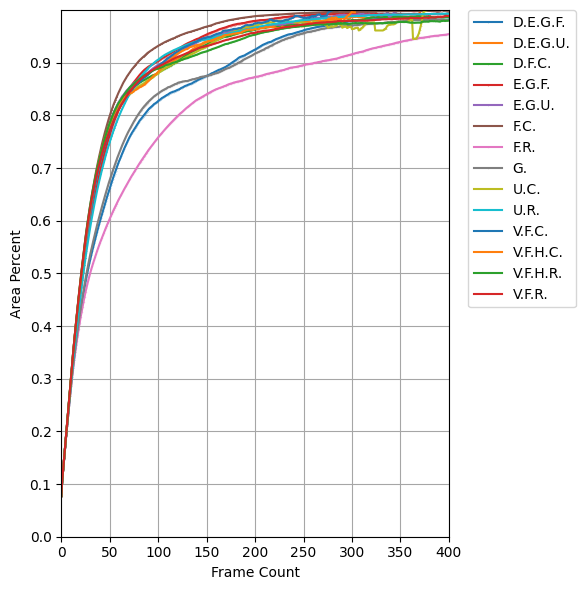

In [49]:
# create a unique marker for each method
markers = ['o', 'v', 's', 'p', 'P', '*', 'X', 'D', 'd', 'x', '1', '2', '3', '4', '8', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

fig, ax = plt.subplots(figsize=(6, 6))
for i,[method, group] in enumerate(df_all.groupby(['M'])):

    # group by 'frame_count' column
    count_group = group.groupby(['Frame Count'])
    # last_compare =-np.inf
    # for j,[method, group] in enumerate(count_group):
    #     # print(method)
    #     # print(group['Area Percent'].mean())
    #     cur_mean = group['Area Percent'].mean()
    #     ax.plot(j, cur_mean, label=method, marker=markers[i])
    #     if cur_mean < last_compare:
    #         print("Error")
    #         print(f"{i}{j}last_compare: {last_compare} cur_mean: {cur_mean}")
                  
    #         break
    #     last_compare = cur_mean

    # # break
    # continue

    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['area_percent'].mean(), label=method, marker=markers[i])
    x_data =count_group['Area Percent'].mean()

    # uniformy sample 1000 data points
    # x_data =count_group['area_percent'].mean().sample(n=1000, replace=True).sort_values()
    plt.plot( x_data, label=method, marker=markers[i])
    

# plt.legend()
# make y axis log scale

# set y range
plt.ylim(0.0,1)
plt.xlim(0,400)
# make x axis log scale

# increase tick frequency every 10
plt.yticks(np.arange(0, 1, .10))
# rotate x axis labels
# plt.xticks(rotation=90)
# add grid
plt.grid(True, which="both", ls="-", color='0.65')
# label the x axis
plt.xlabel('Frame Count')
# label the y axis
plt.ylabel('Area Percent')

# decrease the marker size
plt.rcParams['lines.markersize'] = 0.1

# set the title
# plt.title('Area Percent vs Frame Count')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# tight
plt.tight_layout()

# save the figure
plt.savefig(f"{root_directory}/data_analysis/plots/area_percent_vs_frame_count.png", dpi=300)

In [38]:
final_average = df_all.drop_duplicates(subset=['Method'], keep='last')

final_average

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Success,...,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,Execution Date,M
901987,901987,1.000000,0.13,5.61,41,165,0.0,192,900,True,...,60,200,0.207778,Unknown Random,Center_Start_Position,Rand_Start_Goal,4858,Disrepair,2023-04-20 01:36:43,U.R.
1395964,1395964,1.000000,0.31,6.93,7,363,0.0,79,900,True,...,60,200,0.214444,Voronoi Frontier Help Closest,Center_Start_Position,Rand_Start_Goal,9682,Disrepair,2023-04-20 01:36:43,V.F.H.C.
1939567,1939567,1.000000,0.22,8.09,0,493,0.0,144,900,False,...,80,200,0.196667,Unknown Closest,Center_Start_Position,Rand_Start_Goal,14576,Disrepair,2023-04-20 01:36:43,U.C.
2848114,2848114,1.000000,0.06,8.80,0,1992,0.0,433,900,False,...,80,200,0.193333,Voronoi Frontier Random,Center_Start_Position,Rand_Start_Goal,19439,Disrepair,2023-04-20 01:36:43,V.F.R.
3598811,3598811,1.000000,0.33,3.60,0,127,0.0,106,900,False,...,60,200,0.207778,Voronoi Frontier Help Random,Center_Start_Position,Rand_Start_Goal,24298,Disrepair,2023-04-20 01:36:43,V.F.H.R.
4168095,4168095,1.000000,0.06,4.64,42,227,0.0,109,900,True,...,60,200,0.207778,Epsilon Greedy Unknown,Center_Start_Position,Rand_Start_Goal,29158,Disrepair,2023-04-20 01:36:43,E.G.U.
5055007,5055007,1.000000,0.15,5.41,45,273,0.0,196,900,True,...,80,200,0.193333,Gametheory,Center_Start_Position,Rand_Start_Goal,34019,Disrepair,2023-04-20 01:36:43,G.
5724525,5724525,1.000000,0.14,4.25,28,315,0.0,178,900,True,...,60,200,0.207778,Frontier Closest,Center_Start_Position,Rand_Start_Goal,38878,Disrepair,2023-04-20 01:36:43,F.C.
6554098,6554098,1.000000,0.15,4.72,44,248,0.0,179,900,True,...,80,200,0.193333,Decay Epsilon Greedy Frontier,Center_Start_Position,Rand_Start_Goal,43739,Disrepair,2023-04-20 01:36:43,D.E.G.F.
7175324,7175324,1.000000,0.21,5.45,9,239,0.0,120,900,True,...,80,200,0.195556,Decay Epsilon Greedy Unknown,Center_Start_Position,Rand_Start_Goal,48590,Disrepair,2023-04-20 01:36:43,D.E.G.U.


In [14]:
df_400 = df_all[df_all['Frame Count']<400]

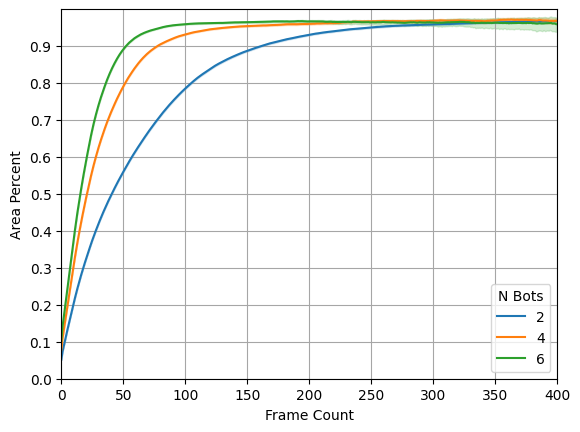

In [50]:
sns.lineplot(
    # frame count less than 400
    data=df_400, 
    x="Frame Count", y="Area Percent", hue="N Bots",
    # col="Loss Type", 
)
# set y range
plt.ylim(0.0,1)
plt.xlim(0,400)
plt.grid(True, which="both", ls="-", color='0.65')
plt.yticks(np.arange(0, 1, .10))


# save the figure
plt.savefig(f"{root_directory}/data_analysis/plots/area_percent_vs_frame_count_n_bots.png", dpi=300)

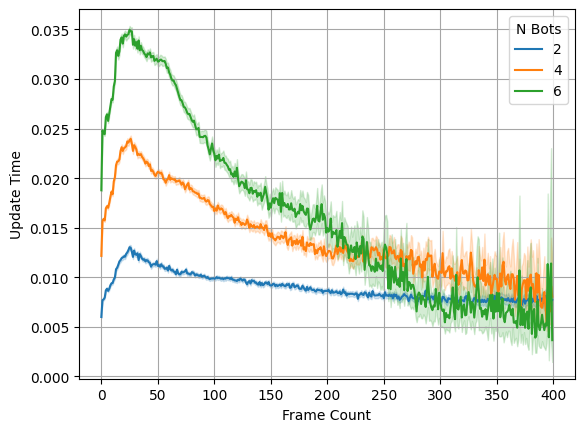

In [52]:
sns.lineplot(
    # frame count less than 400
    data=df_400, 
    x="Frame Count", y="Update Time", hue="N Bots",
    # col="Loss Type", 
)
# set y range
plt.grid(True, which="both", ls="-", color='0.65')
# plt.yticks(np.arange(0, 1, .10))


# save the figure
plt.savefig(f"{root_directory}/data_analysis/plots/update_time_vs_frame_count_n_bots.png", dpi=300)

In [17]:
# The average frame_count for each method
df_all.groupby(['method']).max()['frame_count'].sort_values()

KeyError: 'method'

In [ ]:
df_all.groupby(['method'])['delta_time'].max()

In [ ]:
df_all.groupby(['method']).agg({'delta_time': np.ptp})

In [ ]:
# df_all.groupby(['method'])
for i,[method, group] in enumerate(df_all.groupby(['method'])):
    # group by 'frame_count' column
    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])
    # plt.plot( np.arange(0, len(count_group['delta_time'])), count_group['delta_time'], label=method, marker=markers[i])
    sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )

plt.legend()



In [ ]:
df_all['experiment_ID'].unique()

In [ ]:
# df_all.groupby(['method','experiment_ID'])
for i,[method, group] in enumerate(df_all.groupby(['method', 'experiment_ID'])):
    print("i: ", i, "method: ", method, "group: ", group.shape)
    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])
    # plot mean of 'area_percent' against 'frame_count' 
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])

In [ ]:
sns.lineplot(df_all.groupby(['Experiment Id']).mean().sort_values('Frame Count'), x="Frame Count", y="Area Percent", 
              hue="Method", style="Loss Type", markers=True, dashes=False,
            #   fill=True,
            # thresh=0, levels=5, cmap="mako"
            )

plt.ylim(0.96, 1)